In [88]:
import numpy as np 
import h5py
import scipy.interpolate as interp
from matplotlib.ticker import MultipleLocator
dir_model= '/Users/daniel_vander-hyde/Documents/git/SU/algaas_electrooptic_effect/measurements/FSS_tfs/spice/10_14_2020/'
dir_measurements = '/Users/daniel_vander-hyde/Documents/git/SU/algaas_electrooptic_effect/measurements/FSS_tfs/10_14_2020/'
plt.style.use('/Users/daniel_vander-hyde/Documents/git/my_python/matplotlib/stylelib/pptsize')

In [89]:
#Importing measurement and model data
file_prefix = 'tp14'
dat_model = h5py.File(dir_model + file_prefix + '.h5', 'r')
dat_meas_db = np.loadtxt(dir_measurements + file_prefix + '/' + 'db' + '.TXT')
dat_meas_deg = np.loadtxt(dir_measurements + file_prefix + '/' 'deg' + '.TXT')
ff = dat_meas_db[:,0]

Text(0, 0.5, 'phase [deg]')

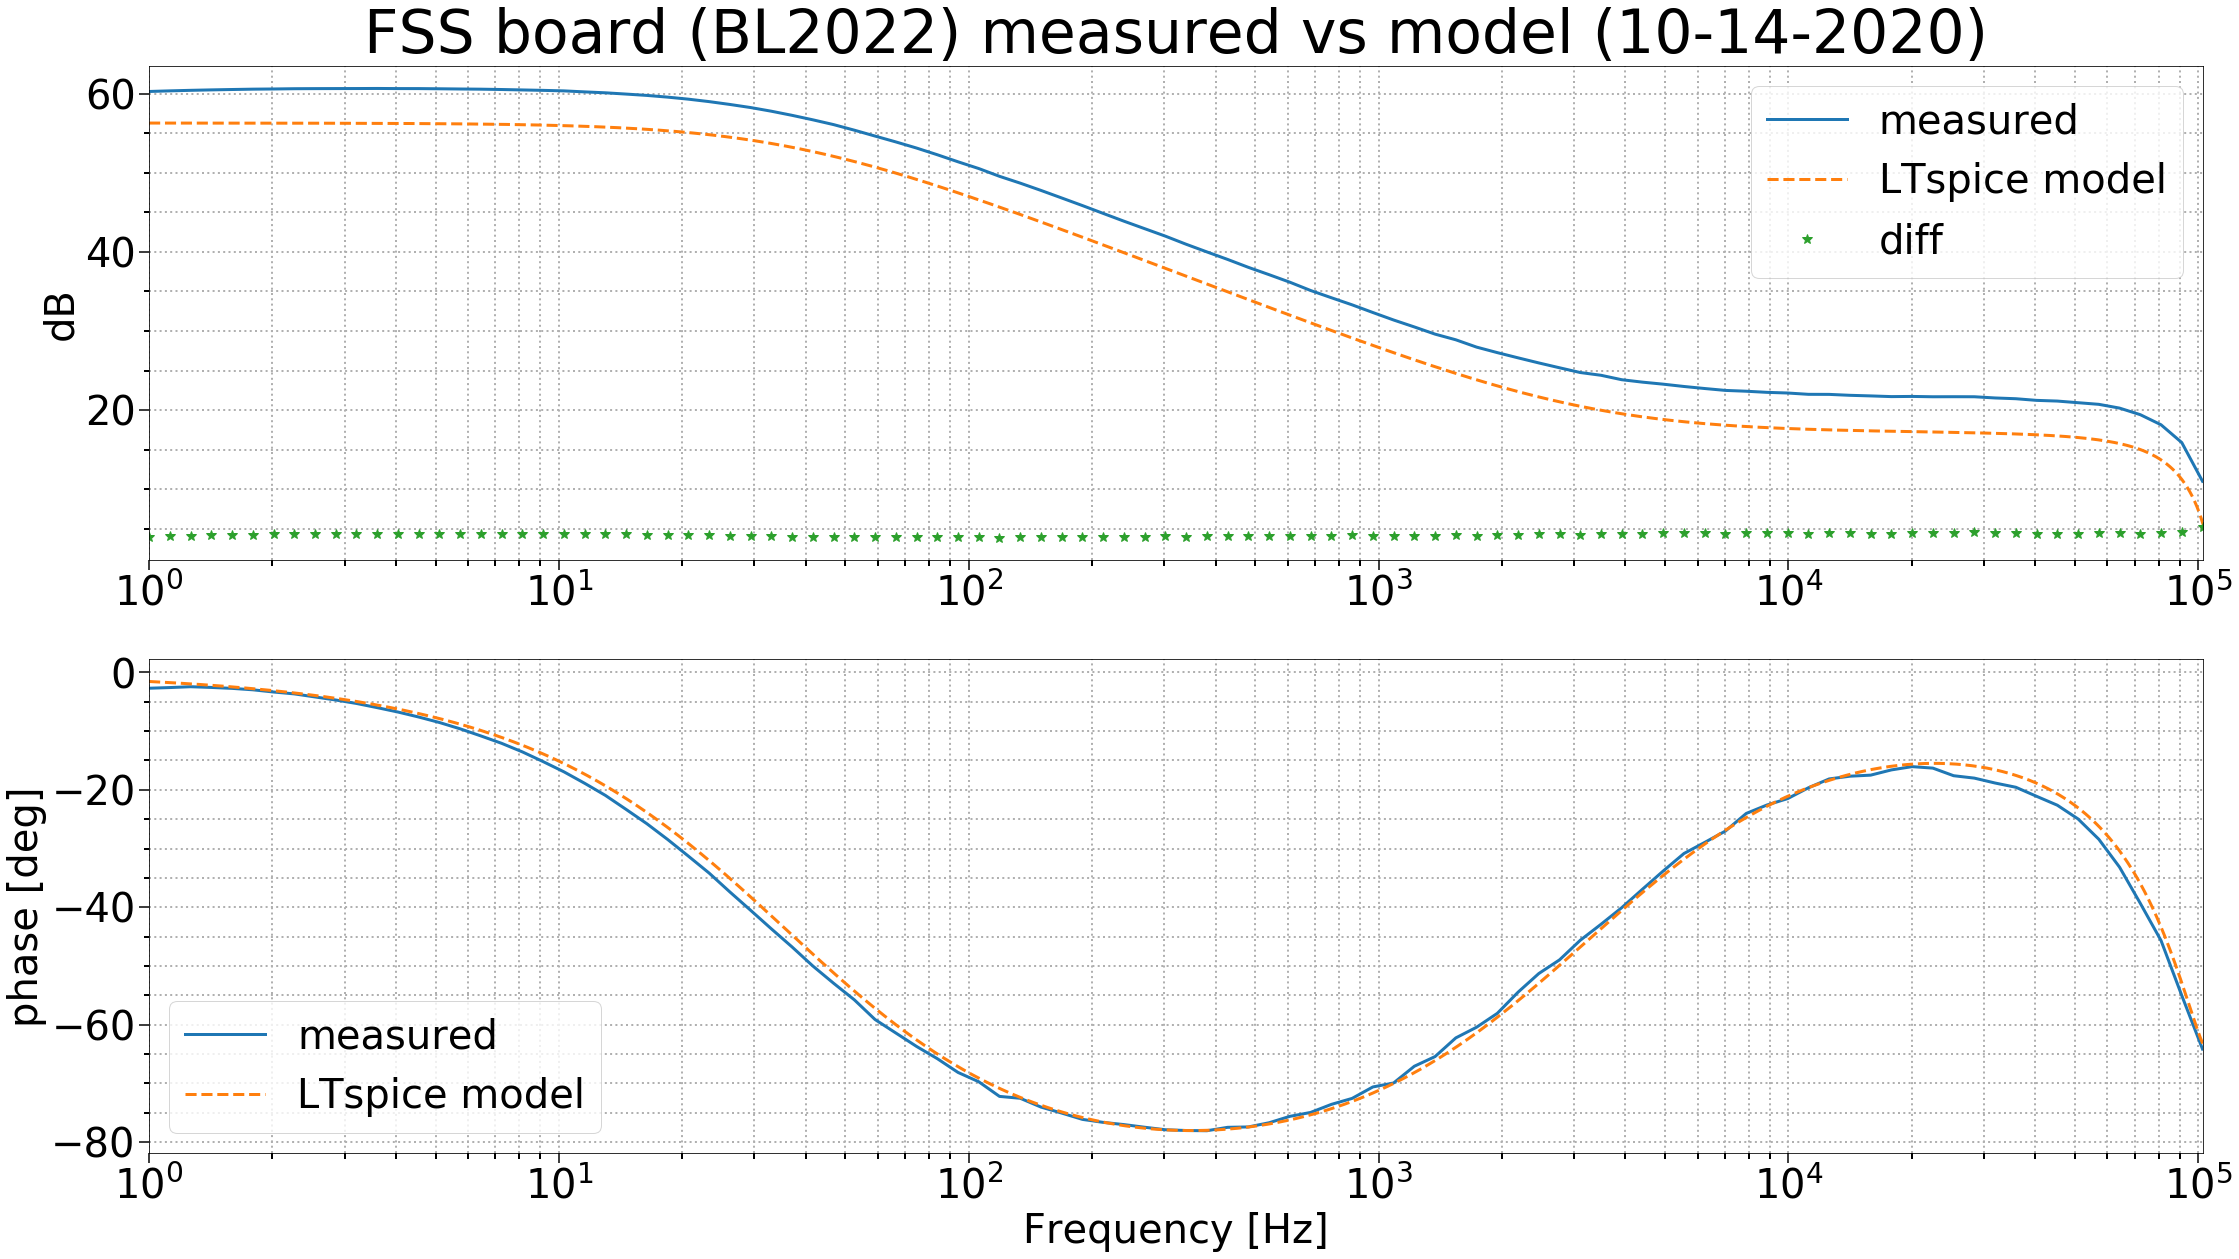

In [90]:
fig = plt.figure()
plt.subplot(211)
plt.semilogx(ff,dat_meas_db[:,1], label='measured')
plt.semilogx(dat_model['freq'], dat_model['dB'],'--', label='LTspice model')
plt.semilogx(ff, diff,'*', label='diff')
plt.xlim(ff[0], ff[-1])
limit = 0
if limit == 1: 
    plt.gca().set_ylim(bottom=0)
plt.ylabel('dB')
plt.legend()
plt.title('FSS board (BL2022) measured vs model (10-14-2020)')
plt.subplot(212)
plt.semilogx(ff,dat_meas_deg[:,1],label='measured')
plt.semilogx(dat_model['freq'], dat_model['deg'],'--', label='LTspice model')
plt.xlim(ff[0], ff[-1])
plt.legend()
plt.xlabel('Frequency [Hz]')
plt.ylabel('phase [deg]')

In [91]:
png_prefix = file_prefix + '_model_v_measured'
fig.savefig(png_prefix + '.png',dpi=150,bbox_inches='tight')

In [25]:
dat_meas_db[:,1]-dat_model['dB']

ValueError: operands could not be broadcast together with shapes (100,) (5014,) 

In [44]:
new_meas = interp.interp1d(dat_model['freq'], dat_model['dB'], kind='linear')

In [46]:
y_new = new_meas(ff)

In [53]:
diff = dat_meas_db[:,1]-y_new

In [55]:
sum(diff)/len(diff)

4.258427923170549

In [56]:
diff

array([3.98913207, 4.0679128 , 4.13622657, 4.19324178, 4.24312209,
       4.28922031, 4.31482348, 4.35190892, 4.36820214, 4.37984653,
       4.39046525, 4.4090165 , 4.40500144, 4.41680717, 4.41066386,
       4.40474722, 4.40882783, 4.40133534, 4.389769  , 4.39011346,
       4.39161232, 4.34752206, 4.33396078, 4.29821241, 4.28269896,
       4.25278593, 4.22044217, 4.17888783, 4.13674233, 4.11445264,
       4.07631842, 4.03719878, 4.01378229, 4.00937223, 3.96073933,
       3.92316137, 3.93861094, 3.96008582, 3.94730229, 3.91995872,
       3.95769557, 3.88865624, 3.95822128, 3.98585573, 3.9893863 ,
       3.99722075, 3.98433709, 3.98387276, 4.02152851, 4.06438118,
       4.03029333, 4.05266576, 4.09130269, 4.07753825, 4.13439311,
       4.16137046, 4.0872411 , 4.13520631, 4.18803223, 4.15607691,
       4.12985069, 4.15148074, 4.11598288, 4.24542941, 4.13104799,
       4.20251866, 4.26628818, 4.29616905, 4.30159371, 4.26243912,
       4.41828978, 4.30148395, 4.38302806, 4.46100677, 4.45383